<a href="https://colab.research.google.com/github/stan587/Data-Science-Portfolio/blob/master/Time_Series_Oil_Price_Forecast/Time_Series_Forecast_of_Brent_and_WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecast of Brent and WTI

Stan Chen Dec 14, 2019

---
### Introduction
This project is created to showcase the possibilities of performing time-series market prediction with Python scripts. Python is a general purpose programming language which in this case I'm using it to train time series predictive models to fill in the missing piece in corporate process solutions: **Forecasting time series analysis**.


### Why use this python procedure to perform this process?

While it's nice to use specialized software such as SAS or IBM SPSS, licensing these softwares could be expensive. 
No matter what tools or technologies are used in this process, it doesn't change the business process logic **as long as the process is done right**. I personally find it **flexible,cost effective and faster** to perform this process with python scripts. 

---
### Processes involved in this project:
1. Data Ingestion
2. Time series modeling
3. Perform prediction using trained models
---

###  CRISP-DM Framework
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment


Data source:
https://datahub.io/core/oil-prices#python



# Data Ingestion

In [1]:
!pip install datapackage
from datapackage import Package
import matplotlib.pyplot as plt 
import pandas as pd

dp_url='https://datahub.io/core/oil-prices/datapackage.json'
dp = Package(dp_url)

# print list of all resources:
print(dp.resource_names)

# print processed tabular data (if exists any)
for resource in dp.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'brent-daily_csv', 'brent-weekly_csv', 'brent-monthly_csv', 'brent-annual_csv', 'wti-daily_csv', 'wti-weekly_csv', 'wti-monthly_csv', 'wti-annual_csv', 'brent-daily_json', 'brent-weekly_json', 'brent-monthly_json', 'brent-annual_json', 'wti-daily_json', 'wti-weekly_json', 'wti-monthly_json', 'wti-annual_json', 'oil-prices_zip', 'brent-daily_csv_preview', 'wti-daily_csv_preview', 'brent-daily', 'brent-weekly', 'brent-monthly', 'brent-annual', 'wti-daily', 'wti-weekly', 'wti-monthly', 'wti-annual']
[[datetime.date(1987, 5, 20), Decimal('18.629999999999999005240169935859739780426025390625')], [datetime.date(1987, 5, 21), Decimal('18.449999999999999289457264239899814128875732421875')], [datetime.date(1987, 5, 22), Decimal('18.550000000000000710542735760100185871124267578125')], [datetime.date(1987, 5, 25), Decimal('18.60000000000000142108547152020037174224853515625')], [datetime.date(1987, 5, 26), Decimal('18.629999999999999005240169935859739780426025390625')], [datet

[[datetime.date(1987, 5, 15), Decimal('18.5799999999999982946974341757595539093017578125')], [datetime.date(1987, 5, 22), Decimal('18.53999999999999914734871708787977695465087890625')], [datetime.date(1987, 5, 29), Decimal('18.60000000000000142108547152020037174224853515625')], [datetime.date(1987, 6, 5), Decimal('18.699999999999999289457264239899814128875732421875')], [datetime.date(1987, 6, 12), Decimal('18.75')], [datetime.date(1987, 6, 19), Decimal('19.010000000000001563194018672220408916473388671875')], [datetime.date(1987, 6, 26), Decimal('18.910000000000000142108547152020037174224853515625')], [datetime.date(1987, 7, 3), Decimal('19.160000000000000142108547152020037174224853515625')], [datetime.date(1987, 7, 10), Decimal('19.57000000000000028421709430404007434844970703125')], [datetime.date(1987, 7, 17), Decimal('20.199999999999999289457264239899814128875732421875')], [datetime.date(1987, 7, 24), Decimal('20.190000000000001278976924368180334568023681640625')], [datetime.date(198

[[datetime.date(1987, 5, 15), Decimal('18.5799999999999982946974341757595539093017578125')], [datetime.date(1987, 6, 15), Decimal('18.8599999999999994315658113919198513031005859375')], [datetime.date(1987, 7, 15), Decimal('19.8599999999999994315658113919198513031005859375')], [datetime.date(1987, 8, 15), Decimal('18.980000000000000426325641456060111522674560546875')], [datetime.date(1987, 9, 15), Decimal('18.309999999999998721023075631819665431976318359375')], [datetime.date(1987, 10, 15), Decimal('18.760000000000001563194018672220408916473388671875')], [datetime.date(1987, 11, 15), Decimal('17.780000000000001136868377216160297393798828125')], [datetime.date(1987, 12, 15), Decimal('17.050000000000000710542735760100185871124267578125')], [datetime.date(1988, 1, 15), Decimal('16.75')], [datetime.date(1988, 2, 15), Decimal('15.730000000000000426325641456060111522674560546875')], [datetime.date(1988, 3, 15), Decimal('14.730000000000000426325641456060111522674560546875')], [datetime.date(19

[[datetime.date(1986, 1, 2), Decimal('25.559999999999998721023075631819665431976318359375')], [datetime.date(1986, 1, 3), Decimal('26')], [datetime.date(1986, 1, 6), Decimal('26.530000000000001136868377216160297393798828125')], [datetime.date(1986, 1, 7), Decimal('25.85000000000000142108547152020037174224853515625')], [datetime.date(1986, 1, 8), Decimal('25.870000000000000994759830064140260219573974609375')], [datetime.date(1986, 1, 9), Decimal('26.030000000000001136868377216160297393798828125')], [datetime.date(1986, 1, 10), Decimal('25.64999999999999857891452847979962825775146484375')], [datetime.date(1986, 1, 13), Decimal('25.0799999999999982946974341757595539093017578125')], [datetime.date(1986, 1, 14), Decimal('24.969999999999998863131622783839702606201171875')], [datetime.date(1986, 1, 15), Decimal('25.17999999999999971578290569595992565155029296875')], [datetime.date(1986, 1, 16), Decimal('23.980000000000000426325641456060111522674560546875')], [datetime.date(1986, 1, 17), Decim

[[datetime.date(1986, 1, 3), Decimal('25.780000000000001136868377216160297393798828125')], [datetime.date(1986, 1, 10), Decimal('25.989999999999998436805981327779591083526611328125')], [datetime.date(1986, 1, 17), Decimal('24.57000000000000028421709430404007434844970703125')], [datetime.date(1986, 1, 24), Decimal('20.309999999999998721023075631819665431976318359375')], [datetime.date(1986, 1, 31), Decimal('19.690000000000001278976924368180334568023681640625')], [datetime.date(1986, 2, 7), Decimal('16.719999999999998863131622783839702606201171875')], [datetime.date(1986, 2, 14), Decimal('16.25')], [datetime.date(1986, 2, 21), Decimal('14.3900000000000005684341886080801486968994140625')], [datetime.date(1986, 2, 28), Decimal('14.25')], [datetime.date(1986, 3, 7), Decimal('12.269999999999999573674358543939888477325439453125')], [datetime.date(1986, 3, 14), Decimal('13.07000000000000028421709430404007434844970703125')], [datetime.date(1986, 3, 21), Decimal('13.44999999999999928945726423989

[[datetime.date(1986, 1, 15), Decimal('22.92999999999999971578290569595992565155029296875')], [datetime.date(1986, 2, 15), Decimal('15.46000000000000085265128291212022304534912109375')], [datetime.date(1986, 3, 15), Decimal('12.6099999999999994315658113919198513031005859375')], [datetime.date(1986, 4, 15), Decimal('12.839999999999999857891452847979962825775146484375')], [datetime.date(1986, 5, 15), Decimal('15.3800000000000007815970093361102044582366943359375')], [datetime.date(1986, 6, 15), Decimal('13.42999999999999971578290569595992565155029296875')], [datetime.date(1986, 7, 15), Decimal('11.589999999999999857891452847979962825775146484375')], [datetime.date(1986, 8, 15), Decimal('15.0999999999999996447286321199499070644378662109375')], [datetime.date(1986, 9, 15), Decimal('14.8699999999999992184029906638897955417633056640625')], [datetime.date(1986, 10, 15), Decimal('14.9000000000000003552713678800500929355621337890625')], [datetime.date(1986, 11, 15), Decimal('15.22000000000000063

In [2]:
# to load only tabular data
src1=dp.get_resource('brent-monthly_csv').read(keyed=True)
src2=dp.get_resource('wti-monthly_csv').read(keyed=True)

In [3]:
# Loading the data into a Panda dataframe
# df1_bre : Data Frame for Brent
df1_bre=pd.DataFrame(src1)
# df2_wti : Data Frame for WTI
df2_wti=pd.DataFrame(src2)

# Visualizing Data

C:\Users\stanl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


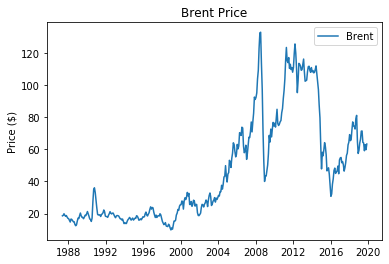

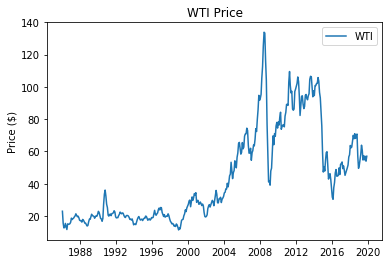

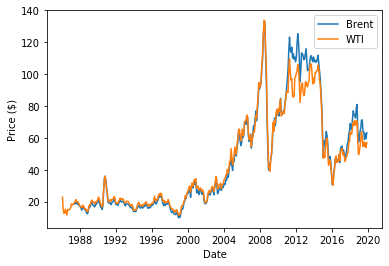

In [4]:
plt.plot(df1_bre['Date'], df1_bre['Price'], label = 'Brent')
plt.title('Brent Price')
plt.ylabel('Price ($)');
plt.legend();
plt.show()

plt.plot(df2_wti['Date'], df2_wti['Price'], label = 'WTI')
plt.title('WTI Price')
plt.ylabel('Price ($)');
plt.legend();
plt.show();

plt.plot(df1_bre['Date'], df1_bre['Price'], label = 'Brent')
plt.plot(df2_wti['Date'], df2_wti['Price'], label = 'WTI')
plt.xlabel('Date');
plt.ylabel('Price ($)');
plt.legend();
plt.show();

# Modeling & Forecasting
While there are several viable options to choose from Prophet, ARIMA, LTMS & other algorithms, in this case we're using Prophet.

In [1]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/33/fb/ad98d46773929079657706e6b2b6e366ba6c282bc2397d8f9b0ea8e5614c/fbprophet-0.5.tar.gz
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\stanl\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\stanl\\AppData\\Local\\Temp\\pip-install-ugq22vk5\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\stanl\\AppData\\Local\\Temp\\pip-install-ugq22vk5\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\stanl\AppData\Local\Temp\pip-wheel-i5oh11rp' --python-tag cp37
       cwd: C:\Users\stanl\AppData\Local\Temp\pip-install-ugq22vk5\fbprophet\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_db8febf10f23d7fa27a62fbcfd7f17b2 NOW.
  error: Microsoft Visual C++ 1

In [ ]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
df1_bre = df1_bre.rename(columns={'Date': 'ds', 'Price': 'y'})
bre_pp = fbprophet.Prophet(changepoint_prior_scale=0.01)

bre_pp.add_seasonality(name='Monthly', period=30.5, fourier_order=4)
bre_pp.add_seasonality(name='2 years', period=365*2, fourier_order=4)

bre_pp.fit(df1_bre)

# Make a future dataframe for 2 years
bre_forecast = bre_pp.make_future_dataframe(periods=12 * 4, freq='M')

# Make predictions
bre_forecast = bre_pp.predict(bre_forecast)

# Plot Projection
bre_pp.plot(bre_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
plt.title('Brent Price Forecast');

In [ ]:
df2_wti = df2_wti.rename(columns={'Date': 'ds', 'Price': 'y'})
wti_pp = fbprophet.Prophet(changepoint_prior_scale=0.0225)
wti_pp.add_seasonality(name='Monthly', period=30.5, fourier_order=4)
wti_pp.add_seasonality(name='2 years', period=365*2, fourier_order=4)

wti_pp.fit(df2_wti)

# Make a future dataframe for 2 years
wti_forecast = wti_pp.make_future_dataframe(periods=12 * 2, freq='M')

# Make predictions
wti_forecast = wti_pp.predict(wti_forecast)


# Plot Projection
wti_pp.plot(wti_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
plt.title('WTI Price Forecast');

# Plotting Trends and patterns


In [ ]:
print("Brent Forecast Trends and Patterns:")
bre_pp.plot_components(bre_forecast, uncertainty = True);



In [ ]:
print("WTI Forecast Trends and Patterns:")
wti_pp.plot_components(wti_forecast, uncertainty = True);

In [ ]:
bre_forecast.to_csv('bre_forecastOutput.csv')
wti_forecast.to_csv('wti_forecastOutput.csv')
bre_forecast


In [ ]:
print(bre_forecast[:50])
print(df1_bre[:50])

# Changepoint Reports

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = wti_pp.plot(wti_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
a = add_changepoints_to_plot(fig.gca(), wti_pp, wti_forecast)

### References:

https://pypi.org/project/datapackage/#resource

https://datahub.io/docs/getting-started/getting-data

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651


https://www.tensorflow.org/tutorials/structured_data/time_series